# GROUP - 2 MLP2 END TERM PROJECT 
Aman Kumar 291064

Meghna Pal 291086

Parivesh Kalosiya 291093

Varad Agarwal 291108

Varnika Benara 291119

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

# Dataset Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Characteristics:Multivariate
	
Number of Instances:4898
	
Area: Business

Attribute Characteristics:Real
	
Number of Attributes:12

Date Donated
2009-10-07

Associated Tasks: Classification, Regression
	
Missing Values?
N/A
	
Number of Web Hits:1492862

In [2]:
red=pd.read_csv("C:\\Users\\amanl\\Downloads\\Grp 2 MLP\\winequality-red_Grp2_MLP2.csv")

In [3]:
white=pd.read_csv("C:\\Users\\amanl\\Downloads\\Grp 2 MLP\\winequality-white_Grp2_MLP2.csv")

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [7]:
print(red.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
print(white.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
yred = red.quality
Xred = red.drop('quality', axis=1)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(Xred, yred,test_size=0.2)

In [13]:
ywhite = white.quality
Xwhite = white.drop('quality', axis=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(Xwhite, ywhite,test_size=0.2)

In [14]:
print(X_train_red.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1335            6.6             0.580         0.02             2.4      0.069   
302             8.3             0.705         0.12             2.6      0.092   
1339            7.5             0.510         0.02             1.7      0.084   
720             8.4             0.560         0.04             2.0      0.082   
1407            6.0             0.510         0.00             2.1      0.064   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1335                   19                    40  0.99387  3.38       0.66   
302                    12                    28  0.99940  3.51       0.72   
1339                   13                    31  0.99538  3.36       0.54   
720                    10                    22  0.99760  3.22       0.44   
1407                   40                    54  0.99500  3.54       0.93   

      alcohol  
1335     12.6  
302      10.0  
13

In [15]:
print(X_train_white.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2237            6.4              0.34         0.20            14.9      0.060   
3524            5.3              0.36         0.27             6.3      0.028   
2433            7.4              0.35         0.20            13.9      0.054   
1657            7.8              0.40         0.49             7.8      0.060   
4352            7.3              0.28         0.35             1.6      0.054   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2237                 37.0                 162.0  0.99830  3.13       0.45   
3524                 40.0                 132.0  0.99186  3.37       0.40   
2433                 63.0                 229.0  0.99888  3.11       0.50   
1657                 34.0                 162.0  0.99660  3.26       0.58   
4352                 31.0                 148.0  0.99178  3.18       0.47   

      alcohol  
2237      9.0  
3524     11.6  
24

In [16]:
X_train_scaled_red = preprocessing.scale(X_train_red)
print(X_train_scaled_red)

[[-0.99870188  0.2915081  -1.29048073 ...  0.46722204  0.00528129
   2.0269881 ]
 [-0.01363678  0.99418216 -0.78225162 ...  1.3137406   0.34874429
  -0.40967684]
 [-0.47719683 -0.10198938 -1.29048073 ...  0.33698841 -0.6816447
   0.05891257]
 ...
 [-1.23048191  0.2915081  -1.39212655 ...  1.63932466  1.03567027
  -0.97198414]
 [ 0.16019823 -0.8327704   0.43749824 ... -0.70488058 -0.56715703
  -0.97198414]
 [-0.70897685  0.40393595 -1.39212655 ...  1.05327335  0.23425662
  -0.50339472]]


In [17]:
X_train_scaled_white = preprocessing.scale(X_train_white)
print(X_train_scaled_white)

[[-0.52839876  0.62779256 -1.09536562 ... -0.38442694 -0.34709684
  -1.23939164]
 [-1.81934459  0.82860417 -0.5186759  ...  1.21131905 -0.78347389
   0.88762428]
 [ 0.64518835  0.72819837 -1.09536562 ... -0.51740577  0.0892802
  -1.32119995]
 ...
 [ 0.52782964 -0.57707712  0.63470354 ...  0.87887197  0.87475889
  -1.32119995]
 [ 0.52782964 -0.77788874  0.88185627 ... -0.25144811 -0.25982143
  -0.42130859]
 [ 0.76254706 -0.87829454  0.05801382 ... -0.58389519  0.0020048
   0.47858276]]


In [18]:
clf_red=tree.DecisionTreeClassifier()
clf_red.fit(X_train_red, y_train_red)
clf_white=tree.DecisionTreeClassifier()
clf_white.fit(X_train_white, y_train_white)

DecisionTreeClassifier()

In [29]:
node_red = clf_red.tree_
print(node_red.node_count)
node_white = clf_white.tree_
print(node_white.node_count)

645
2111


In [19]:
confidence_red = clf_red.score(X_test_red, y_test_red)
print("\nThe confidence score for Red Wine Dataset:\n")
print(confidence_red)
confidence_white = clf_white.score(X_test_white, y_test_white)
print("\nThe confidence score for White Wine Dataset:\n")
print(confidence_white)


The confidence score for Red Wine Dataset:

0.621875

The confidence score for White Wine Dataset:

0.5918367346938775


In [20]:
y_pred_red = clf_red.predict(X_test_red)
y_pred_white = clf_white.predict(X_test_white)

In [21]:
x_red=np.array(y_pred_red).tolist()
x_white=np.array(y_pred_white).tolist()

In [22]:
print("This is the predicted value")
for i in range(0,5):
    print(x_red[i])
print("This is the expected value stored in y_test_red")
y_test_red.head()

This is the predicted value
5
6
5
5
6
This is the expected value stored in y_test_red


187     5
307     6
65      5
651     5
1421    5
Name: quality, dtype: int64

In [23]:
print("This is the predicted value")
for i in range(0,5):
    print(x_white[i])
print("This is the expected value stored in y_test_white")
y_test_white.head()

This is the predicted value
5
7
7
5
7
This is the expected value stored in y_test_white


1034    3
3849    5
3739    7
2561    5
2335    5
Name: quality, dtype: int64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

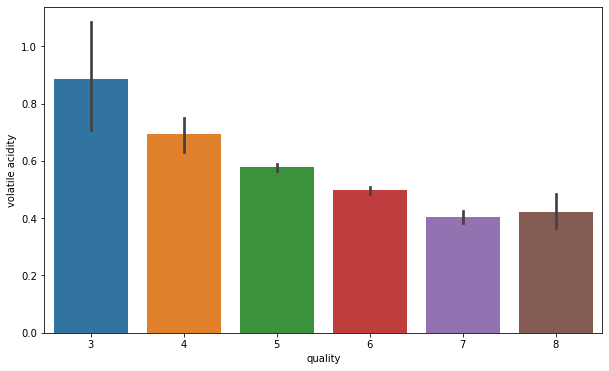

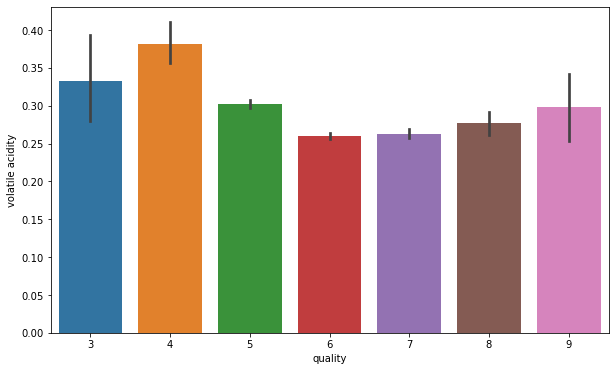

In [25]:
fig1 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = red)
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = white)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

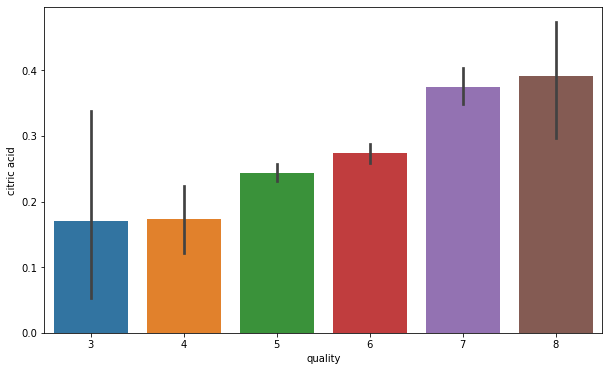

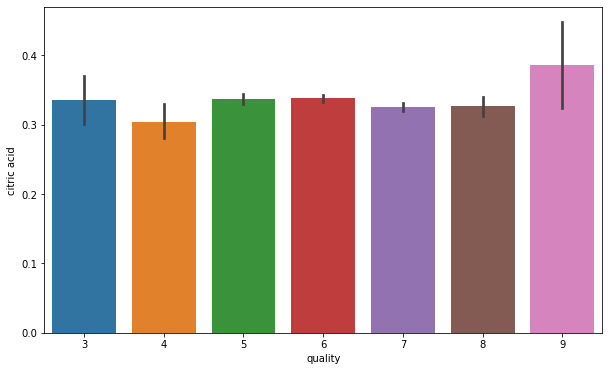

In [26]:
fig1 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = red)
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = white)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

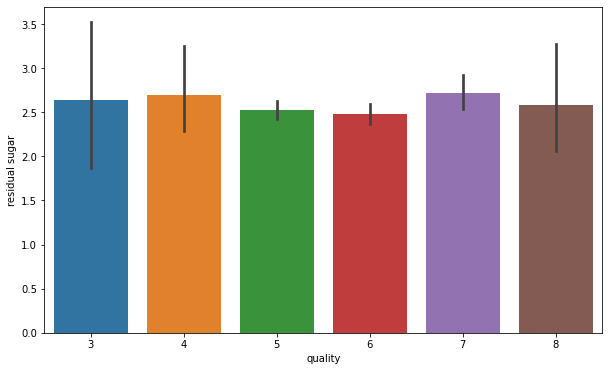

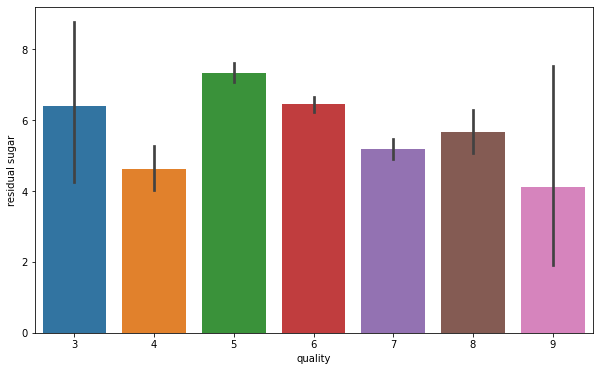

In [27]:
fig1 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = red)
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = white)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

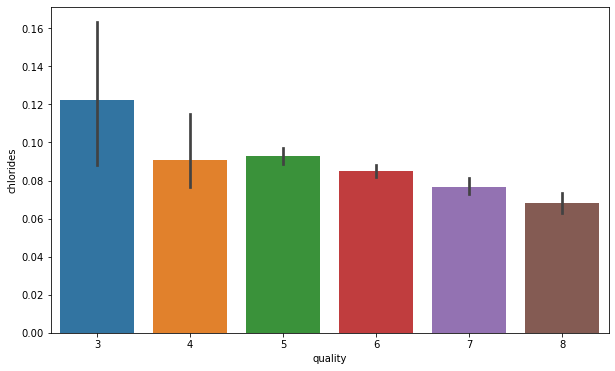

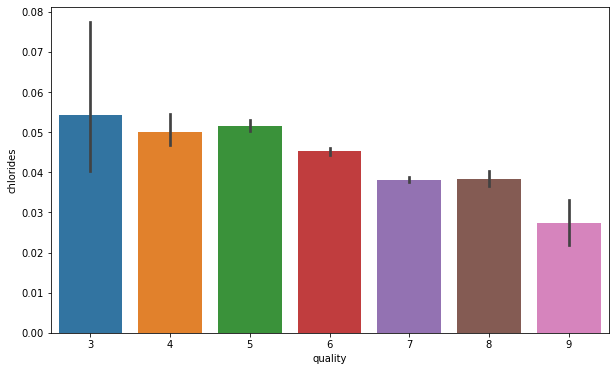

In [28]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig1 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = red)
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = white)